In [15]:
import numpy as np
import pandas as pd
import sys

try:
    if path:
        raise Exception('changed')
except:
    path = True
    sys.path.append('../')

from src.dataset import Animals
from pathlib import Path

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
data_path = Path("../data")

animal_dataset = Animals(data_path.joinpath("zoo.csv"), data_path.joinpath("zoo_target.csv"), n_iter=100, eps=1e-1, silent=False, seed=64)

In [68]:
print(f"Number of samples: {animal_dataset.X.shape[0]}")
print(f"Number of clusters: {animal_dataset.n_clusters}")
print(f"Number of features: {animal_dataset.X.shape[1]}")
print(f"Number of unique values per feature: {animal_dataset.m}")

Number of samples: 101
Number of clusters: 7
Number of features: 15
Number of unique values per feature: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [69]:
animal_dataset.cluster_bos(animal_dataset.n_clusters)

Iteration 0
--------------------
Current mu: [[1 1 2 1 1 2 1 2 2 1 2 1 1 1 2]
 [1 1 1 2 1 1 1 1 1 2 2 2 2 1 1]
 [1 2 2 1 2 2 1 1 1 1 1 2 1 2 2]
 [1 1 1 1 2 1 2 2 2 2 2 1 1 2 1]
 [1 1 2 1 2 2 1 1 1 2 2 2 2 2 2]
 [1 2 2 1 2 2 2 2 1 1 2 2 1 2 1]
 [2 1 2 1 1 1 1 1 1 1 1 2 2 1 2]]
Current pi: [[0.67064065 0.34209654 0.13972985 0.63217719 0.02483587 0.55064881
  0.22123918 0.40627654 0.70080874 0.13159247 0.54218249 0.22870081
  0.16529824 0.12361919 0.08053136]
 [0.6133306  0.64520956 0.18128325 0.77071796 0.38031104 0.21068733
  0.70648243 0.98190037 0.84311629 0.96599469 0.99677358 0.53110886
  0.13159854 0.97527888 0.83604986]
 [0.23828386 0.97395253 0.06629856 0.1158673  0.80537857 0.88047088
  0.36213307 0.65460263 0.02690587 0.1867349  0.85368001 0.38149285
  0.90302188 0.09475723 0.64161028]
 [0.86324499 0.41788986 0.19616081 0.93157739 0.77099732 0.62911875
  0.82391337 0.36073452 0.52716564 0.57987648 0.84573597 0.03417592
  0.43562482 0.25720001 0.34853485]
 [0.07270977 0.24736903

array([7, 7, 1, 7, 7, 7, 7, 1, 1, 7, 7, 4, 1, 6, 6, 6, 4, 7, 1, 1, 4, 4,
       7, 4, 2, 1, 1, 5, 7, 7, 2, 7, 7, 4, 1, 7, 5, 4, 1, 2, 2, 4, 2, 4,
       7, 7, 6, 7, 7, 7, 7, 2, 1, 6, 7, 7, 4, 4, 4, 4, 1, 1, 1, 7, 7, 7,
       1, 7, 7, 7, 7, 4, 2, 1, 7, 7, 1, 6, 4, 4, 1, 2, 1, 4, 5, 6, 1, 4,
       2, 1, 4, 1, 1, 5, 5, 4, 7, 2, 7, 2, 4])

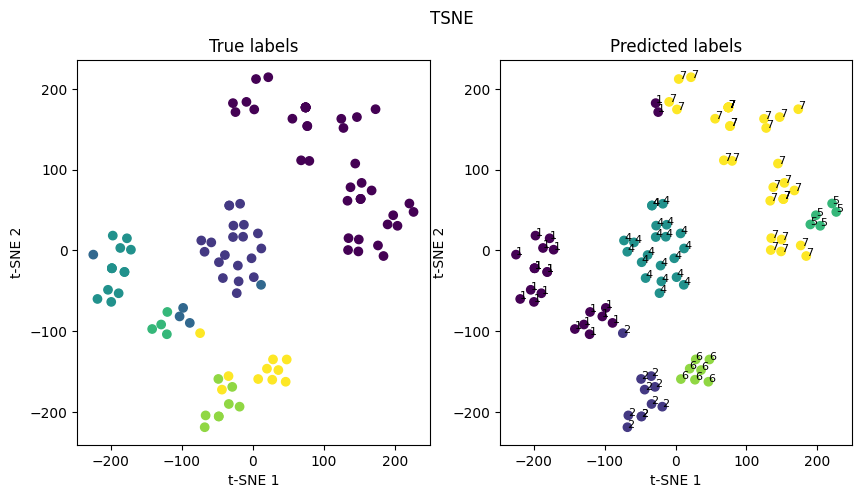

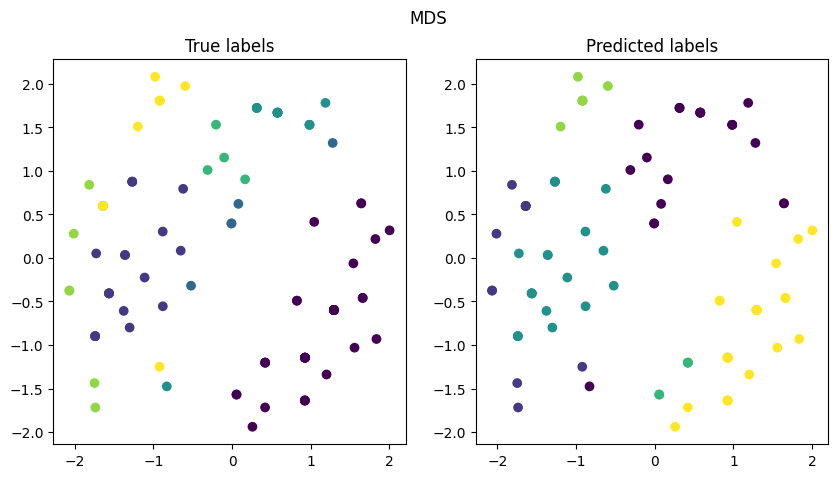

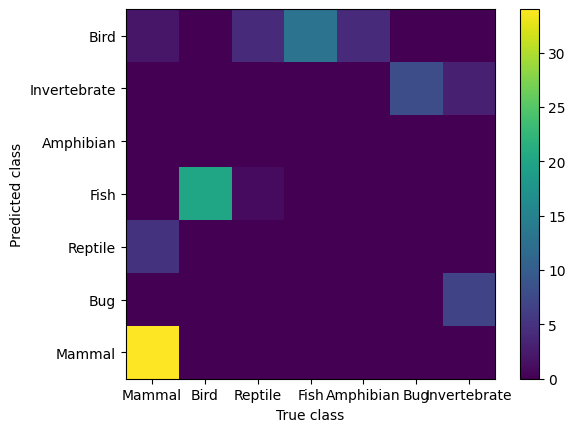

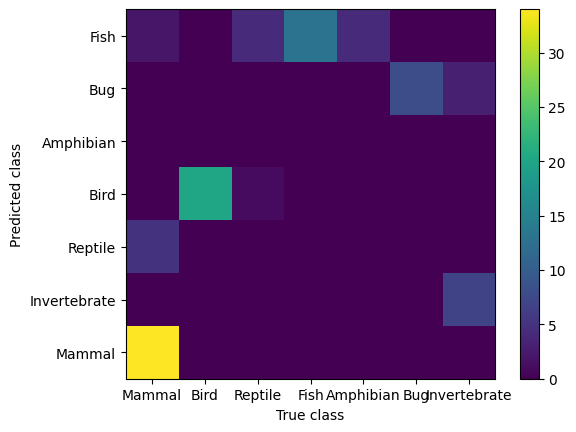

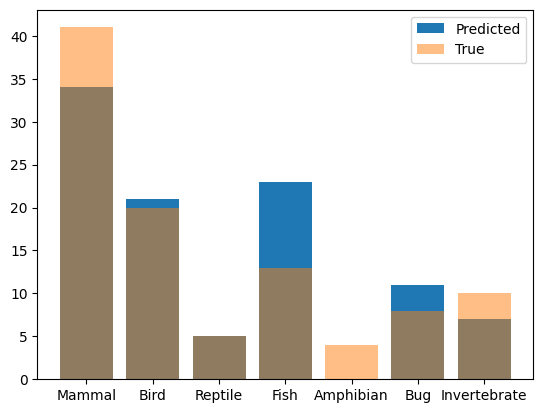

              precision    recall  f1-score   support

         1.0       1.00      0.83      0.91        41
         2.0       0.95      1.00      0.98        20
         3.0       0.00      0.00      0.00         5
         4.0       0.57      1.00      0.72        13
         5.0       0.00      0.00      0.00         4
         6.0       0.73      1.00      0.84         8
         7.0       1.00      0.70      0.82        10

    accuracy                           0.81       101
   macro avg       0.61      0.65      0.61       101
weighted avg       0.82      0.81      0.80       101



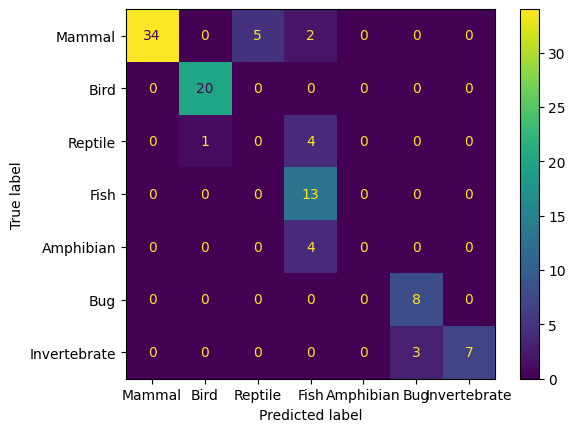

In [76]:
animal_dataset.plot_tsne()
animal_dataset.plot_mds()


In [ ]:
# Assign clusters using histogram matching (ranking)
hist_pred = np.sum(animal_dataset.clusters == np.arange(1, 1 + animal_dataset.n_clusters).reshape(-1, 1), axis=1)
hist_true = np.sum(y == np.arange(1, 1 + animal_dataset.n_clusters).reshape(-1, 1), axis=1)

hist_pred_sorted = np.argsort(hist_pred)
hist_true_sorted = np.argsort(hist_true)

pred_labels = {hist_pred_sorted[i] + 1: animal_dataset.target_decoder[hist_true_sorted[i] + 1] for i in range(animal_dataset.n_clusters)}

animal_dataset.plot_assignment_matrix(pred_labels=pred_labels, target_decoder=animal_dataset.target_decoder)

In [ ]:
# Finding the correct clusters with optimal transport by default

animal_dataset.plot_assignment_matrix()

Optimal transport allows to get a better assignment of the different clusters because it takes into account the cost matrix against just matching the histograms by sorting them.

Note that sorting the historgrams is not necessarily the best way to assign the labels for the newly clustered data. This is because sometimes, two wrongly assigned observations can flip the order of the histograms and lead to a bad label assignment. This is why we use optimal transport to get a better assignment of the different clusters.

In [ ]:
animal_dataset.plot_histograms()

In [ ]:
disp, cr = animal_dataset.classification_results()

In [79]:
from tqdm import tqdm
from collections import defaultdict
from sklearn.metrics import adjusted_rand_score
from scipy.stats import wasserstein_distance

n_exp = 10
scores = defaultdict(list)

for i in tqdm(range(n_exp)):
    print(f"Experiment {i+1}")
    print("-"*20)
    animal_dataset.silent = True
    animal_dataset.seed = i
    clusters = animal_dataset.cluster_bos()
    disp, cr = animal_dataset.classification_results()

    scores["f1"].append(cr["weighted avg"]["f1-score"])
    scores["precision"].append(cr["weighted avg"]["precision"])
    scores["recall"].append(cr["weighted avg"]["recall"])
    scores["wasserstein_distance"].append(wasserstein_distance(clusters, y))
    scores["adjusted_rand_score"].append(adjusted_rand_score(clusters, y))

    print(f"f1-score: {scores['f1'][-1]}")
    print("-"*20)

print(f"f1-score: {np.mean(scores['f1'])} +- {np.std(scores['f1'])} (std)")
print(f"precision: {np.mean(scores['precision'])} +- {np.std(scores['precision'])} (std)")
print(f"recall: {np.mean(scores['recall'])} +- {np.std(scores['recall'])} (std)")
print(f"wasserstein_distance: {np.mean(scores['wasserstein_distance'])} +- {np.std(scores['wasserstein_distance'])} (std)")


  0%|          | 0/10 [00:00<?, ?it/s]

Experiment 1
--------------------


 10%|█         | 1/10 [00:54<08:11, 54.60s/it]

f1-score: 0.7743363150269695
--------------------
Experiment 2
--------------------


 20%|██        | 2/10 [01:33<06:01, 45.17s/it]

f1-score: 0.753363513110722
--------------------
Experiment 3
--------------------


 30%|███       | 3/10 [02:20<05:22, 46.13s/it]

f1-score: 0.8088607106324668
--------------------
Experiment 4
--------------------


 40%|████      | 4/10 [02:48<03:53, 38.87s/it]

f1-score: 0.8564894246861757
--------------------
Experiment 5
--------------------


 50%|█████     | 5/10 [03:23<03:07, 37.54s/it]

f1-score: 0.6997254646622673
--------------------
Experiment 6
--------------------


 60%|██████    | 6/10 [03:55<02:23, 35.78s/it]

f1-score: 0.7228562329917204
--------------------
Experiment 7
--------------------


 70%|███████   | 7/10 [04:28<01:43, 34.66s/it]

f1-score: 0.715806843842279
--------------------
Experiment 8
--------------------


 80%|████████  | 8/10 [05:00<01:07, 33.91s/it]

f1-score: 0.8152942569750106
--------------------
Experiment 9
--------------------


 90%|█████████ | 9/10 [05:47<00:37, 37.90s/it]

f1-score: 0.8623758882150575
--------------------
Experiment 10
--------------------


100%|██████████| 10/10 [06:36<00:00, 39.67s/it]

f1-score: 0.8833423238582551
--------------------
f1-score: 0.7892450974000923 +- 0.06253935886549748 (std)
precision: 0.8173371192753838 +- 0.056552202139663506 (std)
recall: 0.7891089108910891 +- 0.05636612010887242 (std)
wasserstein_distance: 1.0693069306930694 +- 0.43640797022829064 (std)
